In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
electricmotor_data = pd.read_csv('.\electric_motor.csv')
print(electricmotor_data.columns)
electricmotor_data.describe()

Index(['Brand', 'AccelSec', 'TopSpeed_KmH', 'Range_Km', 'Efficiency_WhKm',
       'FastCharge_KmH', 'Seats', 'PriceEuro', 'RapidCharge'],
      dtype='object')


,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,Seats,PriceEuro,RapidCharge
count,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000
mean,7.396117,179.194175,338.786408,189.165049,4.883495,55811.563107,1.048544
std,3.017430,43.573030,126.014444,29.566839,0.795834,34134.665280,0.215963
min,2.100000,123.000000,95.000000,104.000000,2.000000,20129.000000,1.000000
25%,5.100000,150.000000,250.000000,168.000000,5.000000,34429.500000,1.000000
50%,7.300000,160.000000,340.000000,180.000000,5.000000,45000.000000,1.000000
75%,9.000000,200.000000,400.000000,203.000000,5.000000,65000.000000,1.000000
max,22.400000,410.000000,970.000000,273.000000,7.000000,215000.000000,2.000000


In [4]:
electricmotor_data['RapidCharge'] = electricmotor_data['RapidCharge'].map({1:"rapid_charge",2:"not_rapid_charge"})
electricmotor_data['RapidCharge'] = electricmotor_data['RapidCharge'].astype('category')
print(electricmotor_data.head())

         Brand  AccelSec  TopSpeed_KmH  Range_Km  Efficiency_WhKm  \
0       Tesla        4.6           233       450              161   
1  Volkswagen       10.0           160       270              167   
2    Polestar        4.7           210       400              181   
3         BMW        6.8           180       360              206   
4       Honda        9.5           145       170              168   

  FastCharge_KmH  Seats  PriceEuro   RapidCharge  
0            940      5      55480  rapid_charge  
1            250      5      30000  rapid_charge  
2            620      5      56440  rapid_charge  
3            560      5      68040  rapid_charge  
4            190      4      32997  rapid_charge  


In [5]:
print('Shape:',electricmotor_data.shape)
print('Columns:',electricmotor_data.columns)
print('Unique Values:',electricmotor_data['RapidCharge'].unique())
print('Value COunts:',electricmotor_data['RapidCharge'].value_counts())

Shape: (103, 9)
Columns: Index(['Brand', 'AccelSec', 'TopSpeed_KmH', 'Range_Km', 'Efficiency_WhKm',
       'FastCharge_KmH', 'Seats', 'PriceEuro', 'RapidCharge'],
      dtype='object')
Unique Values: ['rapid_charge', 'not_rapid_charge']
Categories (2, object): ['rapid_charge', 'not_rapid_charge']
Value COunts: rapid_charge        98
not_rapid_charge     5
Name: RapidCharge, dtype: int64


# Histogram


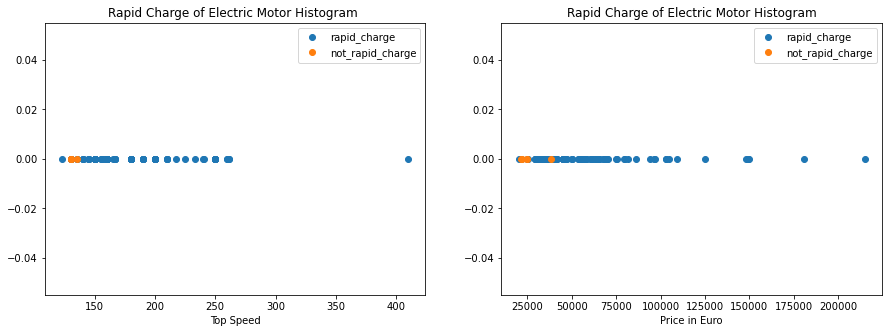

In [7]:
rapidcharge_motor = electricmotor_data.loc[electricmotor_data['RapidCharge']=='rapid_charge']
not_rapidcharge_motor = electricmotor_data.loc[electricmotor_data['RapidCharge']=='not_rapid_charge']
plt.figure(1,figsize=(15,5))

plt.subplot(121)
plt.plot(rapidcharge_motor['TopSpeed_KmH'],np.zeros_like(rapidcharge_motor['TopSpeed_KmH']),'o',label='rapid_charge')
plt.plot(not_rapidcharge_motor['TopSpeed_KmH'],np.zeros_like(not_rapidcharge_motor['TopSpeed_KmH']),'o',label='not_rapid_charge')
plt.legend()
plt.xlabel('Top Speed')
plt.title('Rapid Charge of Electric Motor Histogram ')

plt.subplot(122)
plt.plot(rapidcharge_motor['PriceEuro'],np.zeros_like(rapidcharge_motor['PriceEuro']),'o',label='rapid_charge')
plt.plot(not_rapidcharge_motor['PriceEuro'],np.zeros_like(not_rapidcharge_motor['PriceEuro']),'o',label='not_rapid_charge')
plt.legend()
plt.xlabel('Price in Euro')
plt.title('Rapid Charge of Electric Motor Histogram')
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


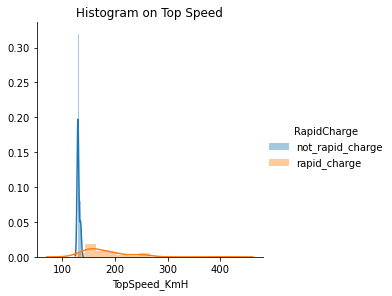

In [17]:
sns.FacetGrid(electricmotor_data,hue='RapidCharge',height=4).map(sns.distplot,'TopSpeed_KmH').add_legend()
plt.title('Histogram on Top Speed')
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


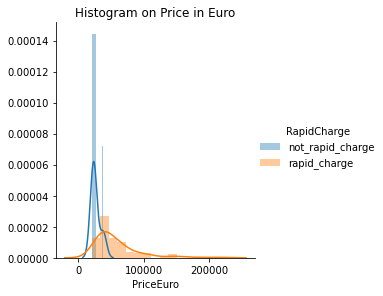

In [19]:
sns.FacetGrid(electricmotor_data,hue='RapidCharge',height=4).map(sns.distplot,'PriceEuro').add_legend()
plt.title('Histogram on Price in Euro')
plt.show()

# Boxtype,violin

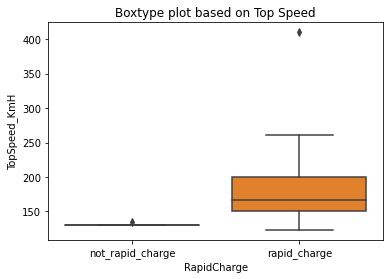

In [37]:
sns.boxplot(x='RapidCharge',y='TopSpeed_KmH',data=electricmotor_data)
plt.title('Boxtype plot based on Top Speed')
plt.show()

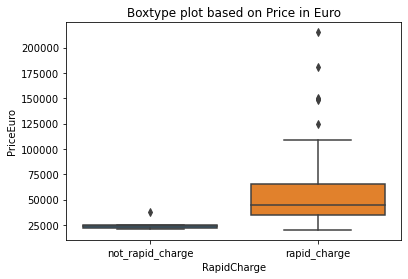

In [38]:
sns.boxplot(x='RapidCharge',y='PriceEuro',data=electricmotor_data)
plt.title('Boxtype plot based on Price in Euro')
plt.show()

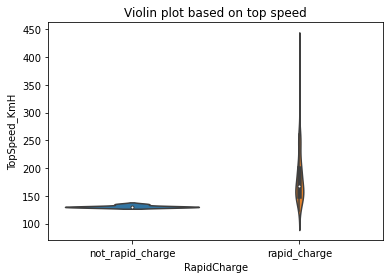

In [39]:
sns.violinplot(x='RapidCharge',y='TopSpeed_KmH',data=electricmotor_data,size=5)
plt.title('Violin plot based on top speed')
plt.show()

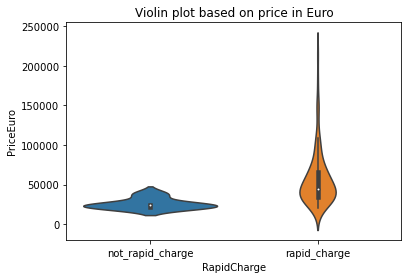

In [40]:
sns.violinplot(x='RapidCharge',y='PriceEuro',data=electricmotor_data,size=5)
plt.title('Violin plot based on price in Euro')
plt.show()

# Multivariate & Bivariate Analysis

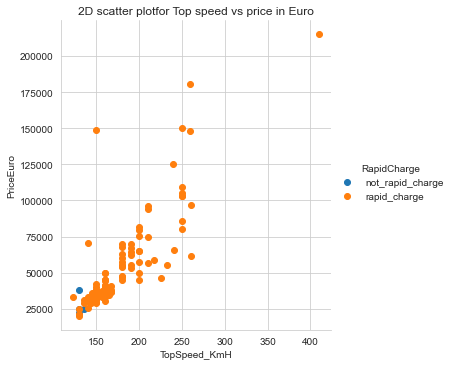

In [41]:
sns.set_style('whitegrid')
sns.FacetGrid(electricmotor_data,hue='RapidCharge',height=5).map(plt.scatter,'TopSpeed_KmH','PriceEuro').add_legend()
plt.title('2D scatter plotfor Top speed vs price in Euro')
plt.show()

# Pair plot

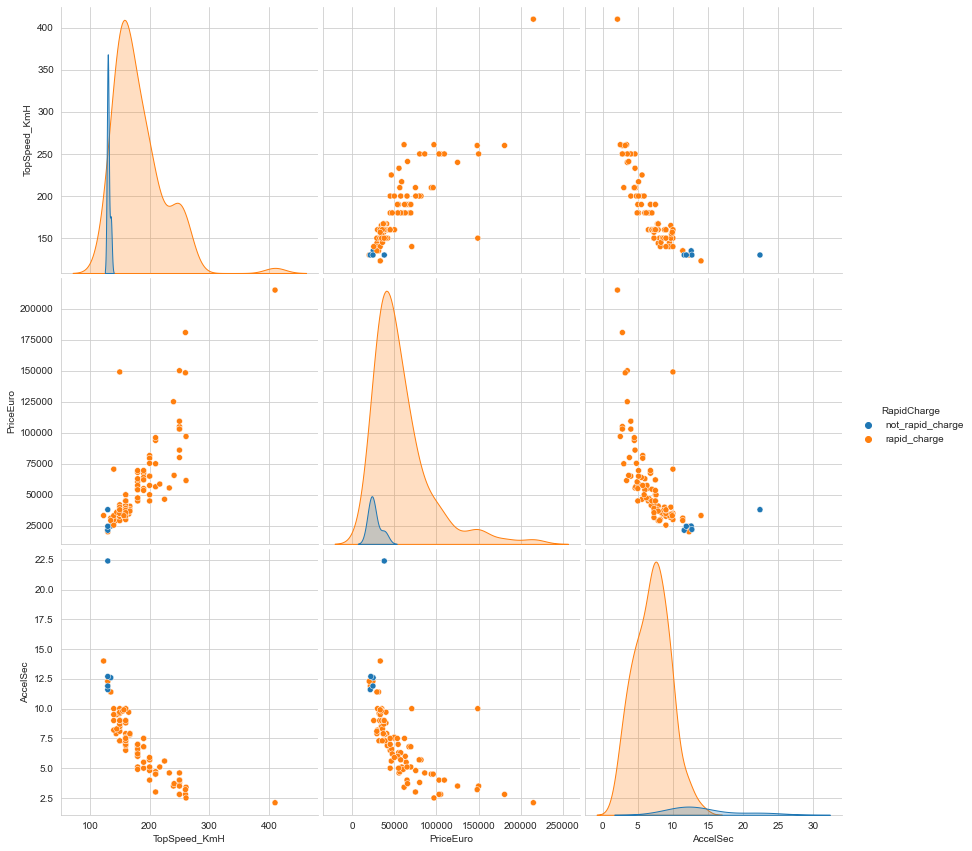

In [42]:
plt.close()
sns.set_style('whitegrid')
sns.pairplot(electricmotor_data, hue='RapidCharge',vars=['TopSpeed_KmH','PriceEuro','AccelSec'],height=4)
plt.show()

# Contour plot

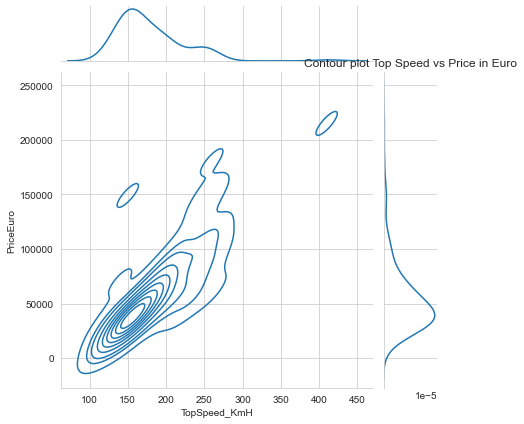

In [43]:
sns.jointplot(x='TopSpeed_KmH',y='PriceEuro',data=electricmotor_data,kind='kde')
plt.title('Contour plot Top Speed vs Price in Euro')
plt.show()